In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

Matplotlib is building the font cache; this may take a moment.


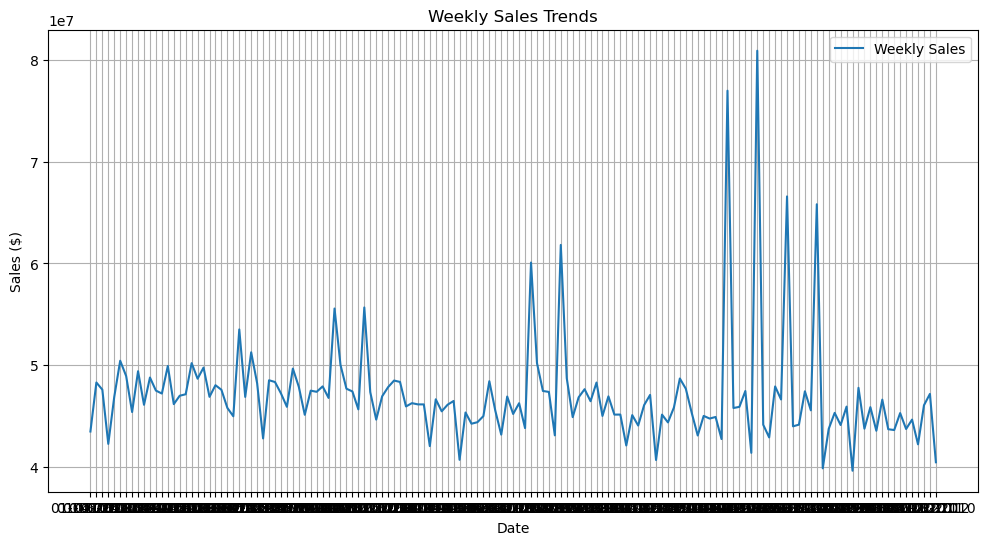

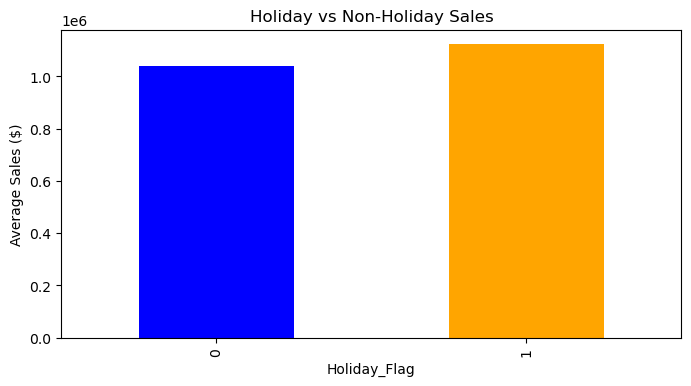

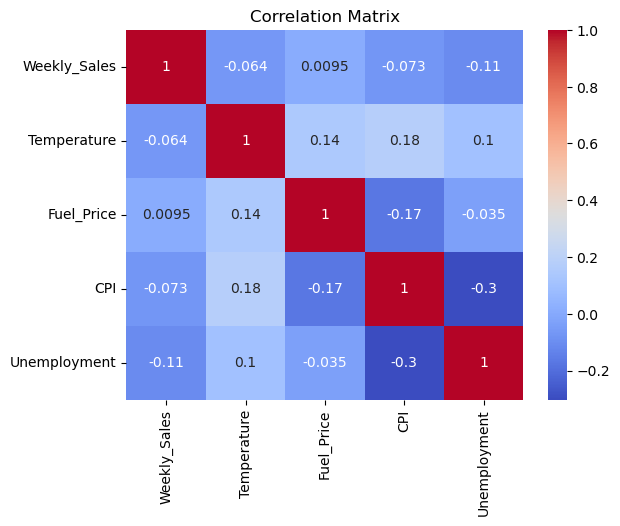

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/tanishq/Desktop/Projects/Walmart_Sales.csv')

# Weekly sales trends
sales_trends = data.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trends.index, sales_trends.values, label='Weekly Sales')
plt.title('Weekly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid()
plt.legend()
plt.show()

# Holiday vs. non-holiday sales
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_sales.plot(kind='bar', figsize=(8, 4), color=['blue', 'orange'], title='Holiday vs Non-Holiday Sales')
plt.ylabel('Average Sales ($)')
plt.show()

# Correlation heatmap
corr_matrix = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None
All dates are valid.


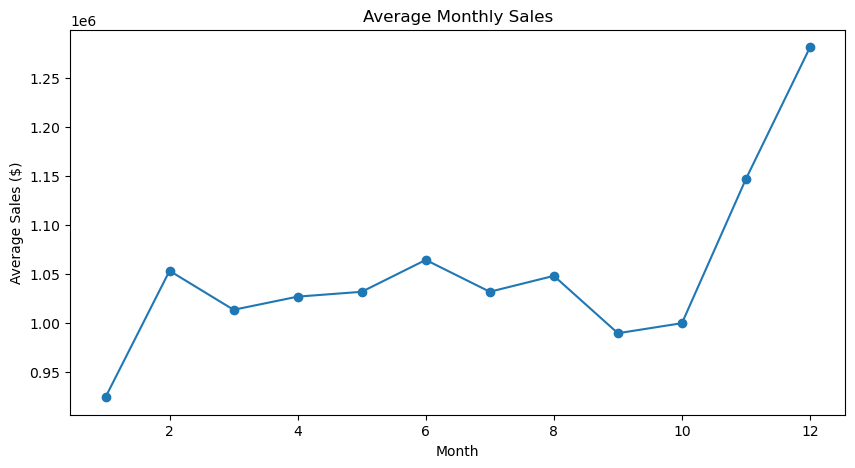

In [19]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')
print(data.info())

# Checking for any rows with invalid dates
invalid_dates = data[data['Date'].isnull()]
if not invalid_dates.empty:
    print("Rows with invalid dates:\n", invalid_dates)
else:
    print("All dates are valid.")

data['Month'] = data['Date'].dt.month

# Group by month and calculate average sales
monthly_sales = data.groupby('Month')['Weekly_Sales'].mean()

# Plotting the trends
monthly_sales.plot(kind='line', figsize=(10, 5), title='Average Monthly Sales', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Sales ($)')
plt.show()



## Sales Heatmap by Week and Store

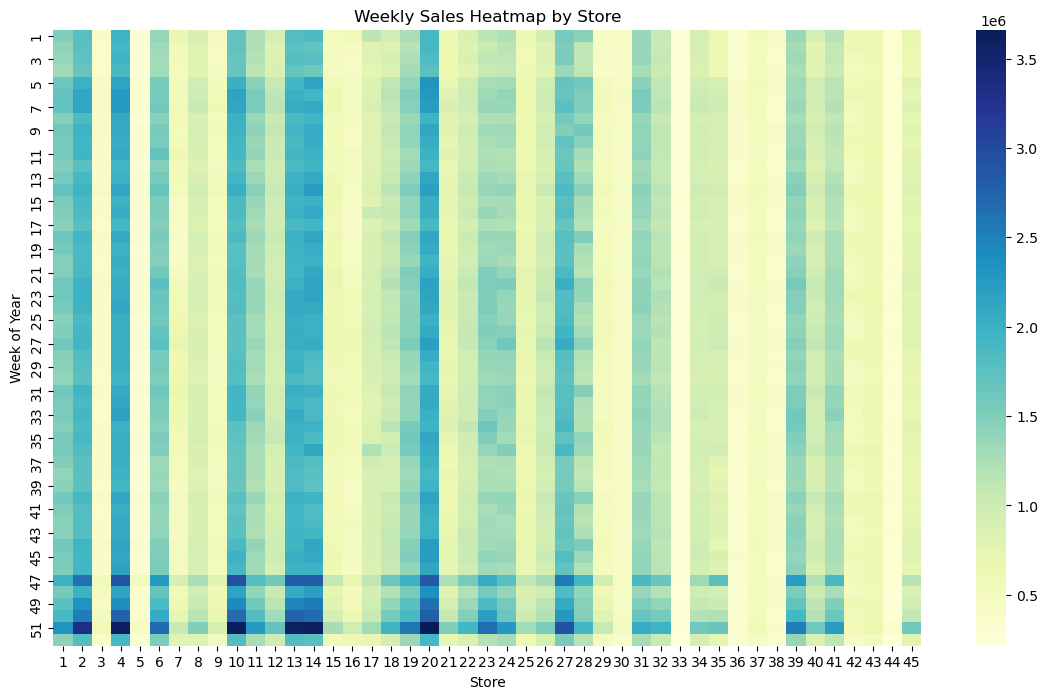

In [23]:
data['Week'] = data['Date'].dt.isocalendar().week

heatmap_data = data.pivot_table(index='Week', columns='Store', values='Weekly_Sales', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Weekly Sales Heatmap by Store')
plt.xlabel('Store')
plt.ylabel('Week of Year')
plt.show()


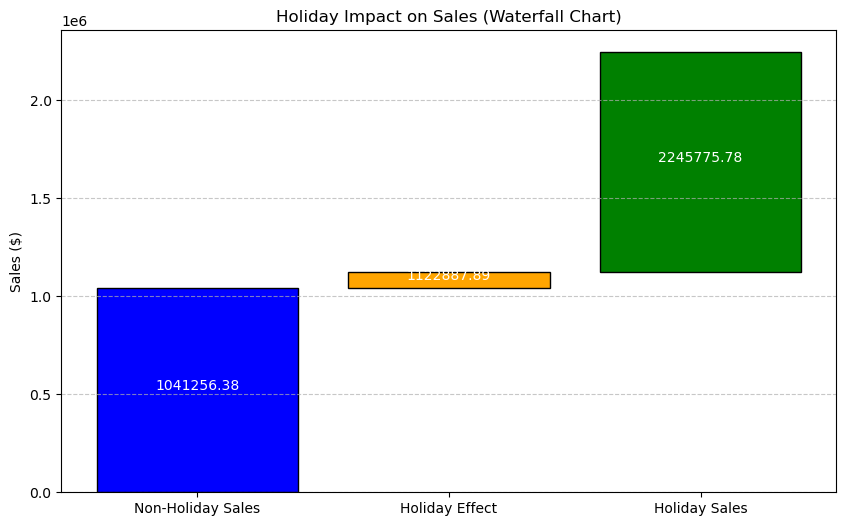

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for Holiday Sales Impact
categories = ['Non-Holiday Sales', 'Holiday Effect', 'Holiday Sales']
values = [holiday_sales[0], holiday_sales[1] - holiday_sales[0], holiday_sales[1]]

# Calculate cumulative values for the waterfall chart
cumulative = np.cumsum([0] + values[:-1])

# Bar colors
colors = ['blue', 'orange', 'green']

# Plot waterfall chart
plt.figure(figsize=(10, 6))
for i in range(len(values)):
    plt.bar(categories[i], values[i], bottom=cumulative[i], color=colors[i], edgecolor='black')

# Add cumulative labels
for i in range(len(cumulative)):
    plt.text(i, cumulative[i] + values[i] / 2, f'{cumulative[i] + values[i]:.2f}', ha='center', color='white')

plt.title('Holiday Impact on Sales (Waterfall Chart)')
plt.ylabel('Sales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


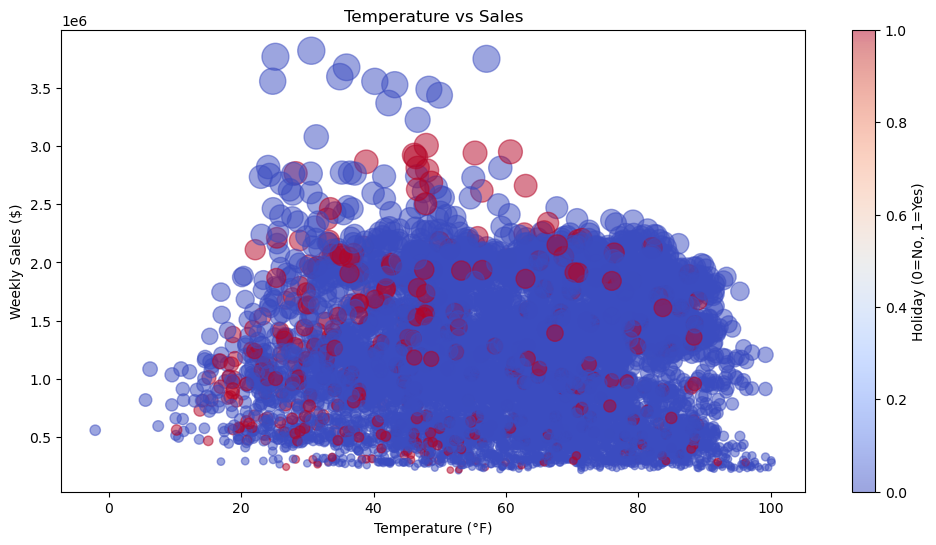

In [35]:
plt.figure(figsize=(12, 6))
bubble_size = data['Weekly_Sales'] / 1e4  # Scale bubble size
plt.scatter(data['Temperature'], data['Weekly_Sales'], s=bubble_size, alpha=0.5, c=data['Holiday_Flag'], cmap='coolwarm')
plt.colorbar(label='Holiday (0=No, 1=Yes)')
plt.title('Temperature vs Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales ($)')
plt.show()

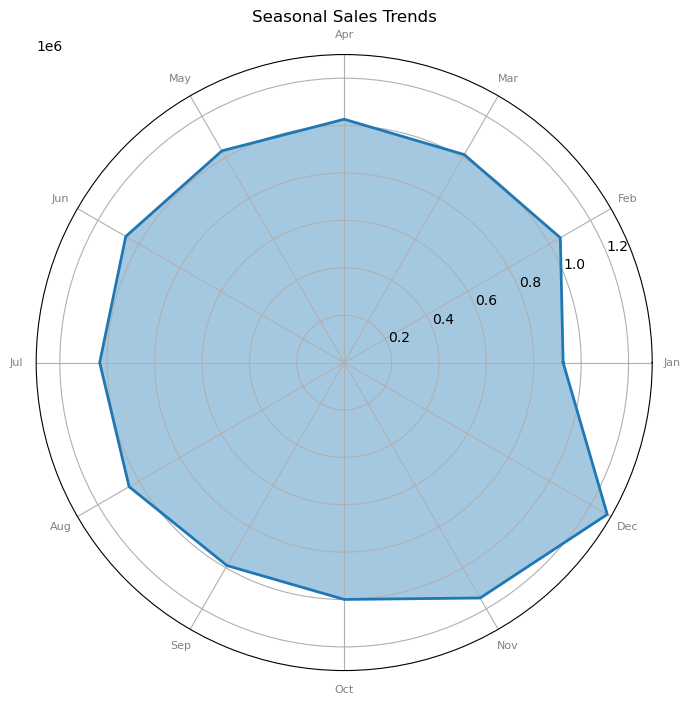

In [37]:
from math import pi

# Group by month and calculate average sales
seasonal_sales = data.groupby(data['Date'].dt.month)['Weekly_Sales'].mean()
categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_values = seasonal_sales.values

# Radar chart setup
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Radar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.plot(angles, list(sales_values) + [sales_values[0]], linewidth=2, linestyle='solid')
ax.fill(angles, list(sales_values) + [sales_values[0]], alpha=0.4)
plt.title('Seasonal Sales Trends')
plt.show()


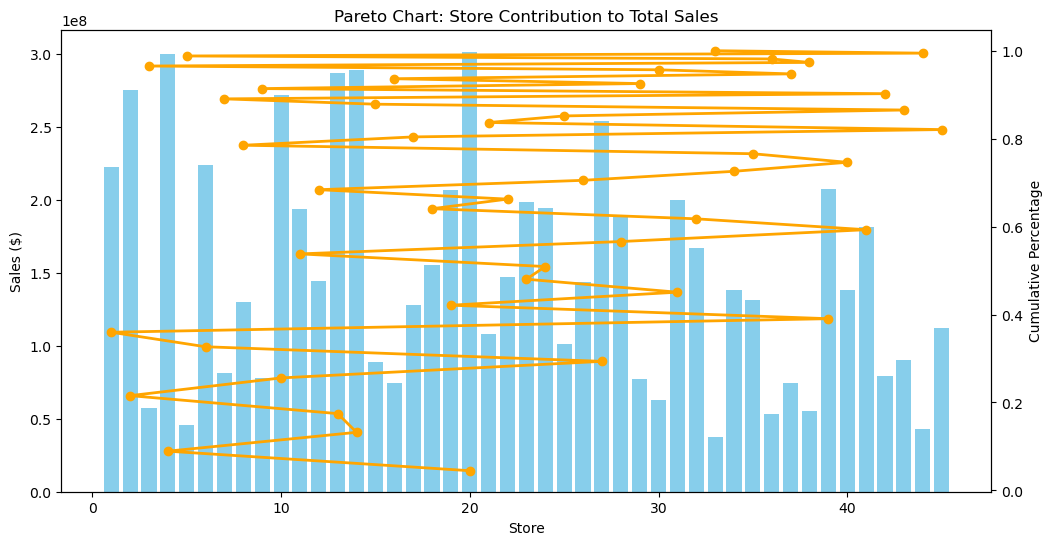

In [39]:
# Calculate store contributions
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
cumulative_sales = store_sales.cumsum() / store_sales.sum()

# Plot Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(store_sales.index, store_sales.values, color='skyblue')
ax2 = ax1.twinx()
ax2.plot(store_sales.index, cumulative_sales, color='orange', marker='o', linewidth=2)
plt.title('Pareto Chart: Store Contribution to Total Sales')
ax1.set_xlabel('Store')
ax1.set_ylabel('Sales ($)')
ax2.set_ylabel('Cumulative Percentage')
plt.show()


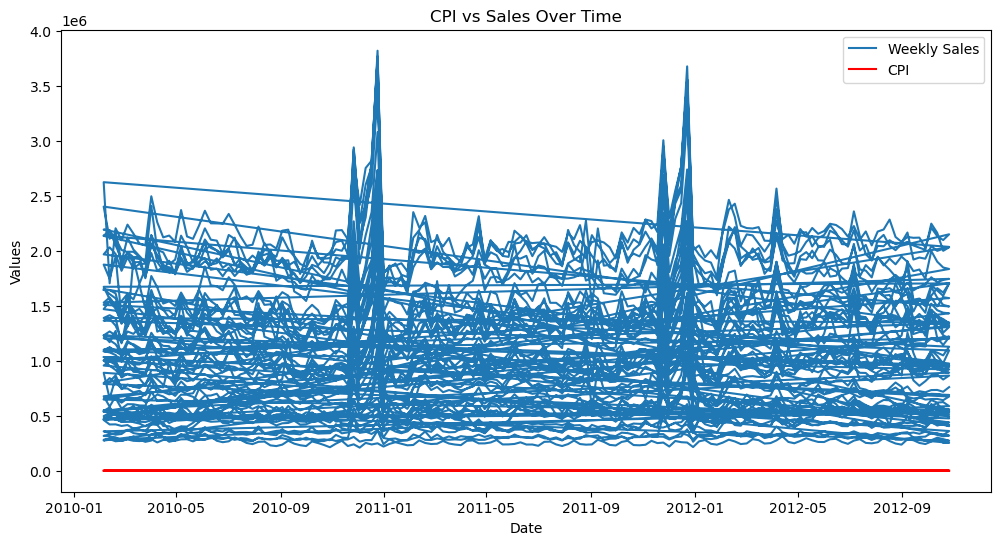

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Weekly_Sales'], label='Weekly Sales')
plt.plot(data['Date'], data['CPI'], label='CPI', color='red')
plt.legend()
plt.title('CPI vs Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()
